<a href="https://colab.research.google.com/github/saydn169/Data-Science-Assignment/blob/master/IrisDataSet_DataAnalysis(TF_Keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from sklearn.datasets import load_iris

In [19]:
iris=load_iris()

In [20]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [21]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [22]:
import pandas as pd

In [23]:
X=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [24]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
y=pd.DataFrame(data=iris.target,columns=["irisType"])

In [26]:
y.head()

,irisType
0,0
1,0
2,0
3,0
4,0


In [27]:
y.irisType.value_counts()

2    50
1    50
0    50
Name: irisType, dtype: int64

In [28]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
import seaborn as sns

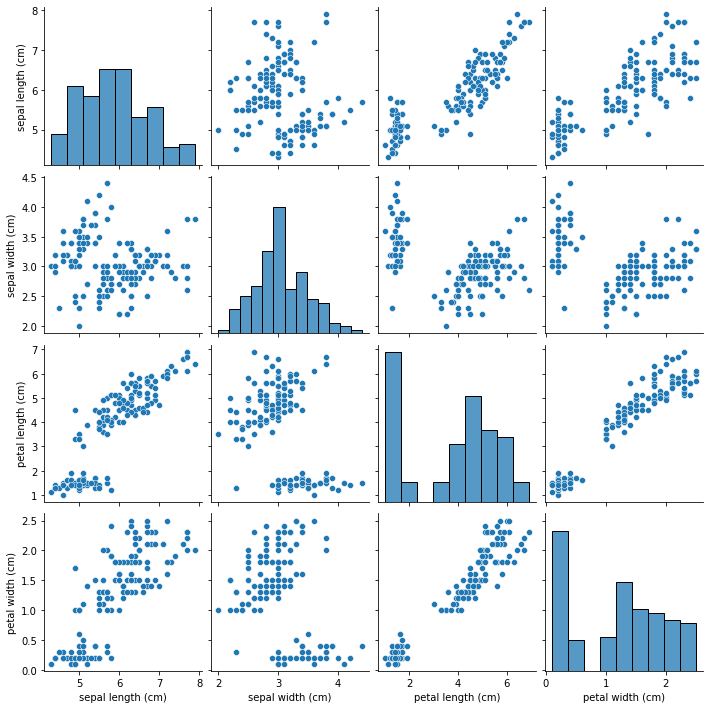

In [30]:
sns.pairplot(X)


In [ ]:
##Veri ön işlemeye geçebiliriz.

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.1, random_state=42)

In [34]:
X_train.shape

(135, 4)

In [35]:
X_test.shape

(15, 4)

In [36]:
print(y_train.shape)
print(y_test.shape)

(135, 1)
(15, 1)


In [37]:
X_train.var(), X_test.var()

(sepal length (cm)    0.694776
 sepal width (cm)     0.191114
 petal length (cm)    3.107892
 petal width (cm)     0.578925
 dtype: float64, sepal length (cm)    0.638095
 sepal width (cm)     0.192667
 petal length (cm)    3.318095
 petal width (cm)     0.623524
 dtype: float64)

In [38]:
import tensorflow as tf


In [39]:
y_train=tf.keras.utils.to_categorical(y_train)

In [40]:
y_test=tf.keras.utils.to_categorical(y_test)

In [41]:
y_train[:5,:]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [42]:
X_train=X_train.values
X_test=X_test.values

In [43]:
X_train[0]

array([6.3, 3.3, 4.7, 1.6])

In [ ]:
##veri ön işleme sona erdi. Model kurmaya başlayalım.

In [44]:
from tensorflow.keras.models import Sequential

In [45]:
from tensorflow.keras.layers import Dense

In [46]:
model=Sequential()
model.add(Dense(64,activation="relu", 
                input_shape=X_train[0].shape))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(3,activation="softmax"))

In [47]:
model.compile(optimizer="adam", loss="categorical_crossentropy",
              metrics=["acc"])

In [48]:
history=model.fit(X_train,y_train,
                  batch_size=32,
                  epochs=7,
                  validation_split=0.1)

Epoch 1/7
4/4 [==============================] - 1s 111ms/step - loss: 1.0356 - acc: 0.4597 - val_loss: 0.8538 - val_acc: 0.6429
Epoch 2/7
4/4 [==============================] - 0s 22ms/step - loss: 0.8338 - acc: 0.6940 - val_loss: 0.7187 - val_acc: 0.6429
Epoch 3/7
4/4 [==============================] - 0s 25ms/step - loss: 0.7158 - acc: 0.7130 - val_loss: 0.6761 - val_acc: 1.0000
Epoch 4/7
4/4 [==============================] - 0s 23ms/step - loss: 0.6357 - acc: 0.9626 - val_loss: 0.6151 - val_acc: 0.9286
Epoch 5/7
4/4 [==============================] - 0s 21ms/step - loss: 0.5354 - acc: 0.8191 - val_loss: 0.5578 - val_acc: 0.6429
Epoch 6/7
4/4 [==============================] - 0s 23ms/step - loss: 0.4921 - acc: 0.7206 - val_loss: 0.5054 - val_acc: 1.0000
Epoch 7/7
4/4 [==============================] - 0s 24ms/step - loss: 0.4293 - acc: 0.9100 - val_loss: 0.4739 - val_acc: 1.0000


In [49]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
Se

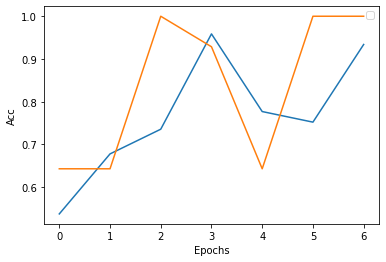

In [53]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend("Training","Validation")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
Se

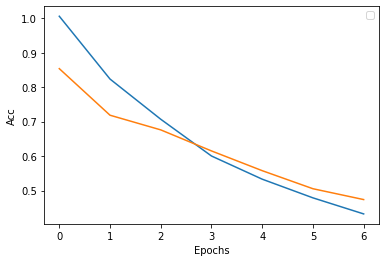

In [54]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend("Training","Validation")

In [55]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 20ms/step - loss: 0.3950 - acc: 0.9333


[0.3949892818927765, 0.9333333373069763]